# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span> - <span style="color:red"> Only for master students</span>


In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

You can use a Python code similar to the following one to observe how the sampled points distribute into the 3D space:

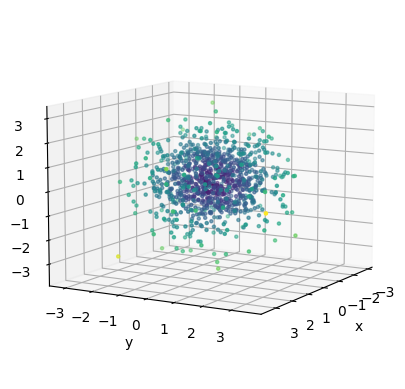

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=1000
X=np.random.normal(0.0,1.0,M)
Y=np.random.normal(0.0,1.0,M)
Z=np.random.normal(0.0,1.0,M)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=np.sqrt(Z**2+X**2+Y**2), marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

## SUBMISSION

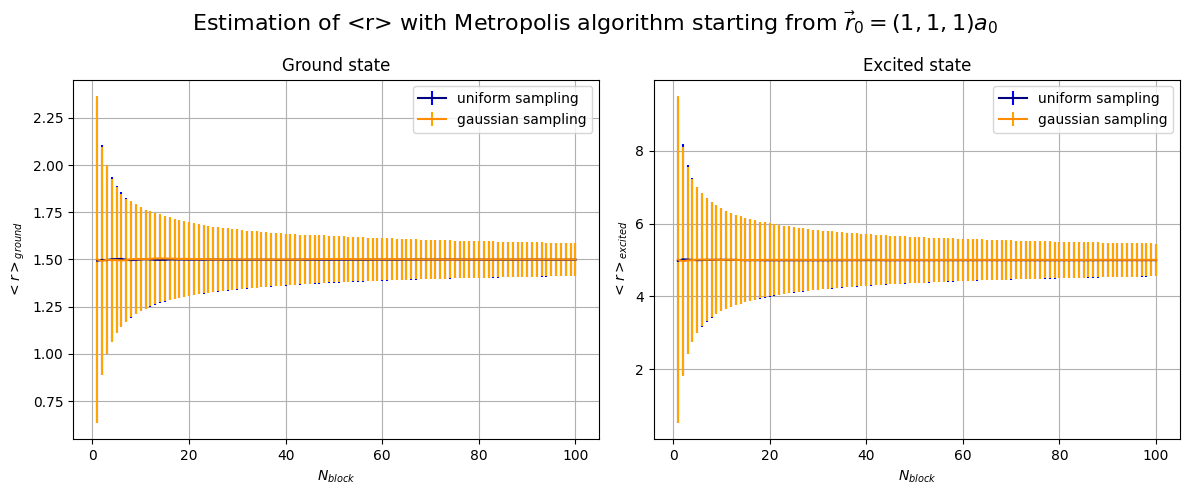

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

unif_ground=pd.read_fwf("./OUTPUT/out_ground_unif.dat",skiprows=9,index_col="BLOCK:")
unif_excited=pd.read_fwf("./OUTPUT/out_excited_unif.dat",skiprows=9,index_col="BLOCK:")
gauss_ground=pd.read_fwf("./OUTPUT/out_ground_gauss.dat",skiprows=9,index_col="BLOCK:")
gauss_excited=pd.read_fwf("./OUTPUT/out_excited_gauss.dat",skiprows=9,index_col="BLOCK:")

fig= plt.figure(figsize=(12,5))
ax1=fig.add_subplot(1,2,1)
ax1.errorbar(x=unif_ground.index,y=unif_ground["AVERAGE VALUE:"],yerr=unif_ground["ERROR:"],color='navy',ecolor='blue',label="uniform sampling")
ax1.errorbar(x=gauss_ground.index,y=gauss_ground["AVERAGE VALUE:"],yerr=gauss_ground["ERROR:"],color='darkorange',ecolor='orange',label="gaussian sampling")
ax1.set_xlabel(r"$N_{block}$",fontsize=10)
ax1.set_ylabel(r"$<r>_{ground}$",fontsize=10)
ax1.set_title(r"Ground state",fontsize=12)
ax1.grid(True)
ax1.legend()

ax2=fig.add_subplot(1,2,2)
ax2.errorbar(x=unif_excited.index,y=unif_excited["AVERAGE VALUE:"],yerr=unif_excited["ERROR:"],color='navy',ecolor='blue',label="uniform sampling")
ax2.errorbar(x=gauss_excited.index,y=gauss_excited["AVERAGE VALUE:"],yerr=gauss_excited["ERROR:"],color='darkorange',ecolor='orange',label="gaussian sampling")
ax2.set_xlabel(r"$N_{block}$",fontsize=10)
ax2.set_ylabel(r"$<r>_{excited}$",fontsize=10)
ax2.set_title(r"Excited state",fontsize=12)
ax2.grid(True)
ax2.legend()

plt.suptitle(r"Estimation of <r> with Metropolis algorithm starting from $\vec{r}_0=(1,1,1)a_0$",fontsize=16)
plt.tight_layout()
plt.show()

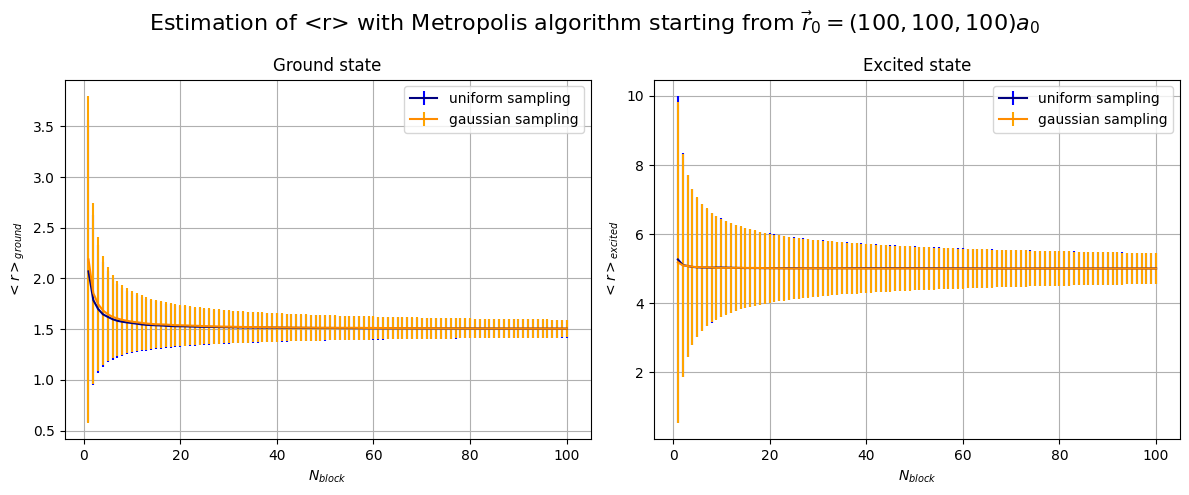

In [16]:
unif_ground_far=pd.read_fwf("./OUTPUT/out_ground_unif_far.dat",skiprows=9,index_col="BLOCK:")
unif_excited_far=pd.read_fwf("./OUTPUT/out_excited_unif_far.dat",skiprows=9,index_col="BLOCK:")
gauss_ground_far=pd.read_fwf("./OUTPUT/out_ground_gauss_far.dat",skiprows=9,index_col="BLOCK:")
gauss_excited_far=pd.read_fwf("./OUTPUT/out_excited_gauss_far.dat",skiprows=9,index_col="BLOCK:")

fig= plt.figure(figsize=(12,5))
ax3=fig.add_subplot(1,2,1)
ax3.errorbar(x=unif_ground_far.index,y=unif_ground_far["AVERAGE VALUE:"],yerr=unif_ground_far["ERROR:"],color='navy',ecolor='blue',label="uniform sampling")
ax3.errorbar(x=gauss_ground_far.index,y=gauss_ground_far["AVERAGE VALUE:"],yerr=gauss_ground_far["ERROR:"],color='darkorange',ecolor='orange',label="gaussian sampling")
ax3.set_xlabel(r"$N_{block}$",fontsize=10)
ax3.set_ylabel(r"$<r>_{ground}$",fontsize=10)
ax3.set_title(r"Ground state",fontsize=12)
ax3.grid(True)
ax3.legend()

ax4=fig.add_subplot(1,2,2)
ax4.errorbar(x=unif_excited_far.index,y=unif_excited_far["AVERAGE VALUE:"],yerr=unif_excited_far["ERROR:"],color='navy',ecolor='blue',label="uniform sampling")
ax4.errorbar(x=gauss_excited_far.index,y=gauss_excited_far["AVERAGE VALUE:"],yerr=gauss_excited_far["ERROR:"],color='darkorange',ecolor='orange',label="gaussian sampling")
ax4.set_xlabel(r"$N_{block}$",fontsize=10)
ax4.set_ylabel(r"$<r>_{excited}$",fontsize=10)
ax4.set_title(r"Excited state",fontsize=12)
ax4.grid(True)
ax4.legend()

plt.suptitle(r"Estimation of <r> with Metropolis algorithm starting from $\vec{r}_0=(100,100,100)a_0$",fontsize=16)
plt.tight_layout()
plt.show()

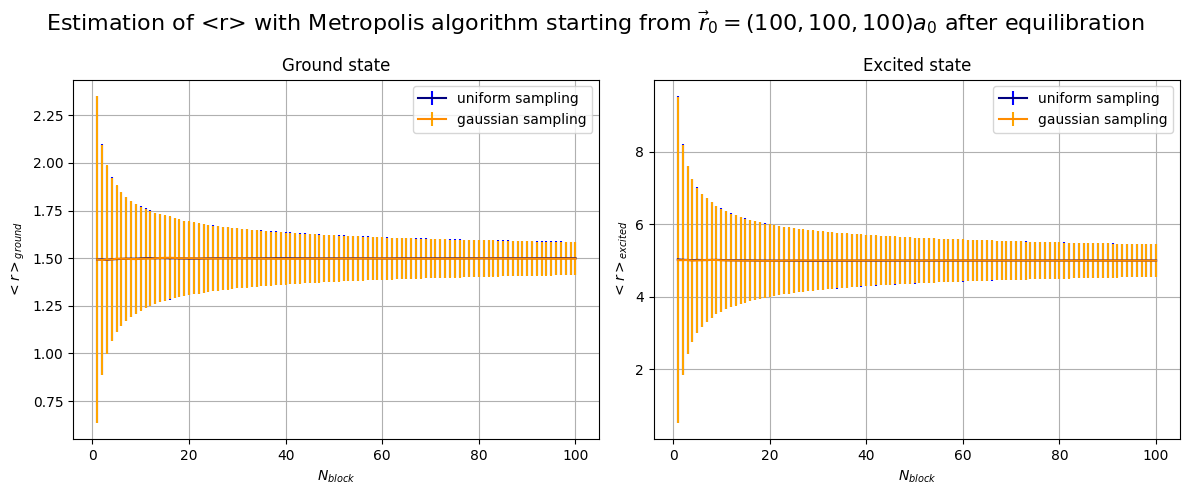

In [17]:
unif_ground_far_eq=pd.read_fwf("./OUTPUT/out_ground_unif_far_eq.dat",skiprows=9,index_col="BLOCK:")
unif_excited_far_eq=pd.read_fwf("./OUTPUT/out_excited_unif_far_eq.dat",skiprows=9,index_col="BLOCK:")
gauss_ground_far_eq=pd.read_fwf("./OUTPUT/out_ground_gauss_far_eq.dat",skiprows=9,index_col="BLOCK:")
gauss_excited_far_eq=pd.read_fwf("./OUTPUT/out_excited_gauss_far_eq.dat",skiprows=9,index_col="BLOCK:")

fig= plt.figure(figsize=(12,5))
ax5=fig.add_subplot(1,2,1)
ax5.errorbar(x=unif_ground_far_eq.index,y=unif_ground_far_eq["AVERAGE VALUE:"],yerr=unif_ground_far_eq["ERROR:"],color='navy',ecolor='blue',label="uniform sampling")
ax5.errorbar(x=gauss_ground_far_eq.index,y=gauss_ground_far_eq["AVERAGE VALUE:"],yerr=gauss_ground_far_eq["ERROR:"],color='darkorange',ecolor='orange',label="gaussian sampling")
ax5.set_xlabel(r"$N_{block}$",fontsize=10)
ax5.set_ylabel(r"$<r>_{ground}$",fontsize=10)
ax5.set_title(r"Ground state",fontsize=12)
ax5.grid(True)
ax5.legend()

ax6=fig.add_subplot(1,2,2)
ax6.errorbar(x=unif_excited_far_eq.index,y=unif_excited_far_eq["AVERAGE VALUE:"],yerr=unif_excited_far_eq["ERROR:"],color='navy',ecolor='blue',label="uniform sampling")
ax6.errorbar(x=gauss_excited_far_eq.index,y=gauss_excited_far_eq["AVERAGE VALUE:"],yerr=gauss_excited_far_eq["ERROR:"],color='darkorange',ecolor='orange',label="gaussian sampling")
ax6.set_xlabel(r"$N_{block}$",fontsize=10)
ax6.set_ylabel(r"$<r>_{excited}$",fontsize=10)
ax6.set_title(r"Excited state",fontsize=12)
ax6.grid(True)
ax6.legend()

plt.suptitle(r"Estimation of <r> with Metropolis algorithm starting from $\vec{r}_0=(100,100,100)a_0$ after equilibration",fontsize=16)
plt.tight_layout()
plt.show()

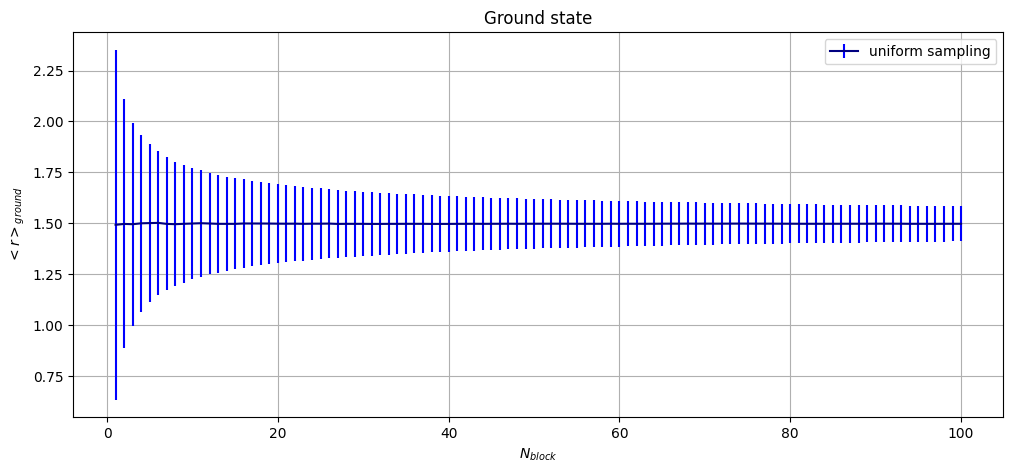

In [9]:
unif_ground=pd.read_fwf("./OUTPUT/out_ground.dat",skiprows=9,index_col="BLOCK:")

plt.figure(figsize=(12,5))
plt.errorbar(x=unif_ground.index,y=unif_ground["AVERAGE VALUE:"],yerr=unif_ground["ERROR:"],color='navy',ecolor='blue',label="uniform sampling")
plt.xlabel(r"$N_{block}$",fontsize=10)
plt.ylabel(r"$<r>_{ground}$",fontsize=10)
plt.title(r"Ground state",fontsize=12)
plt.grid(True)
plt.legend()